In [1]:
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')
from math import ceil
#Plots
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import parallel_coordinates
#Advanced optimization
from scipy import optimize as op

In [2]:
path = 'C:/Users/parth/Desktop/Udemy/ML/Algo Implementation From Scratch/'
iris = pd.read_csv(path+'IRIS.csv')
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


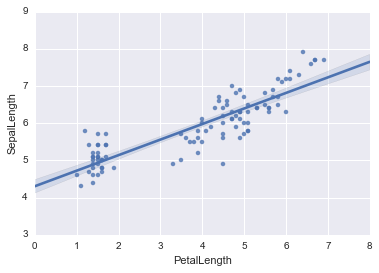

In [3]:
%matplotlib inline
sb.regplot(x='PetalLength',y='SepalLength',data=iris)
plt.show()

The lease square model finds least square as the error and tries to minimize it.

The cost function for lin. regression = least square = sum ((y-bx)^2) = (Y - XB).T * (Y - XB).
The values of B for which RSS will be least is the gradient of the cost function equalling to 0.

This gives B = (X.T * X)^-1 * (X.T.Y)

In [6]:
from numpy.linalg import inv
def getCoefs(X, Y):
    B = inv(X.T.dot(X)).dot(X.T.dot(Y))
    return B

In [45]:
m = iris.shape[0]
n = 2
X = np.ones((m,n)).astype(float)
y = np.array((m,1))

X[:,1] = iris['PetalLength'].values
#X[:,1] = iris2['PetalWidth'].values
y = iris['SepalLength'].values

In [8]:
B = getCoefs(X, y)
B

array([ 4.30464344,  0.41790614])

So, from the above 'B' values we can say that 
equation of the regression line => y = .4179 * x + 4.30464

Let's plot the above line.

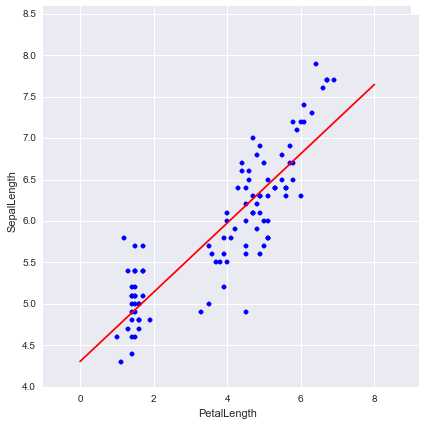

In [21]:
x = [0,1,2,3,4,5,6,7,8]
regline = [B[1]*i + B[0] for i in x]

grid = sb.JointGrid(iris.PetalLength, iris.SepalLength, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter,color='b')
plt.plot(x,regline,'r')
plt.show()

Let's visualize the cost function.

In [46]:
Y = y
print('X = ',X.shape)
print('Y = ',Y.shape)
print('B = ',B.shape)

X =  (100, 2)
Y =  (100,)
B =  (2, 20)


In [35]:
Z = ((Y - X.dot(B)).T).dot(Y - X.dot(B))
Z

17.507522827747518

In [38]:
np.arange(-10, 10, 1)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [39]:
np.arange(-1, 1, .1)

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

In [49]:
B = np.vstack((np.arange(-10, 10, 1), np.arange(-1, 1, .1)))
B.shape

(2, 20)

In [48]:
Z = ((Y - X.dot(B)).T).dot(Y - X.dot(B))
Z

ValueError: operands could not be broadcast together with shapes (100,) (100,20) 

ValueError: shapes (20,20) and (2,20) not aligned: 20 (dim 1) != 2 (dim 0)

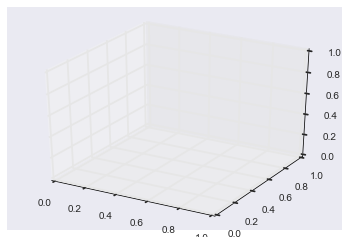

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
#X = iris['PetalLength'].values
#Y = iris['SepalLength'].values
#Y = y
#X, Y = np.meshgrid(B[0], B[1])
#R = np.sqrt(X**2 + Y**2)
Z = ((Y - X.dot(B)).T).dot(Y - X.dot(B))

# Plot the surface.
surf = ax.plot_surface(B[0], B[1], Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()